## Final Project Submission


* Student name: Swaleh Mwadime Athuman
* Student pace: Full time
* Scheduled project review date: 12th March,2023



# RECOMMENDATIONS FOR MICROSOFT NEW MOVIE STUDIO 



Importing Python Libraries for data science

In [3]:
import pandas as pd   #data loading

import numpy as np     #arithmetic computations

#Data visualization
import matplotlib.pyplot as plt        
import seaborn as sns

#Structured Query Language(SQL)
import sqlite3


# Datasets 
- bom.movie_gross.csv
- im.db
- tmdb.movies.csv
- tn.movie_budgets.csv



# Trends in Box Office Movies(bom)


loading the data using pandas library

In [4]:
#loading bom.movies_gross data set
bom_movie=pd.read_csv(r'C:\Users\Admin\Desktop\MORINGASCHOOL\dsc-phase-1-project-v2-4\SWALEH ATHUMAN\bom.movie_gross.csv')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


# Data cleaning (bom.movie_gross.csv)
- detail information about the dataset using .info() function
- check Missing values   .isna() function
- Duplicated rows

In [5]:
#description of the bom_movie information
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
#check missing values
missing_values=bom_movie.isna()

#calculate total missing values in each column
missing_values.sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

- Replace any missing values in the 'studio' column with the string "Unknown".
- This will make it clear that these values were missing, and allow you to filter or group the data based on whether the studio is known or unknown.



In [7]:

replace_missing_values= bom_movie['studio'].fillna("Unknown", inplace=True)

#Return a new dataframe with the missing values in 'studio' replaced with 'Unknown'
missing_values = bom_movie.isnull().sum()
print(missing_values)



title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [8]:
#Drop the column foreign_ gross column since it has many missing values
bom_movie.drop('foreign_gross', axis=1, inplace=True)


In [9]:
#print the column names to check if foreign_gross column is still present
print(bom_movie.columns)



Index(['title', 'studio', 'domestic_gross', 'year'], dtype='object')


In [10]:
# Duplicated rows
duplicates= bom_movie.duplicated()
print('Number of duplictaes:',duplicates.sum())

Number of duplictaes: 0


In [11]:
#display the first five rows
bom_movie.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


# Analysis 1: Top 10 Highest Grossing Movies of All Time
- Let's find out the top 10 highest grossing movies of all time in the dataset based on their domestic gross.



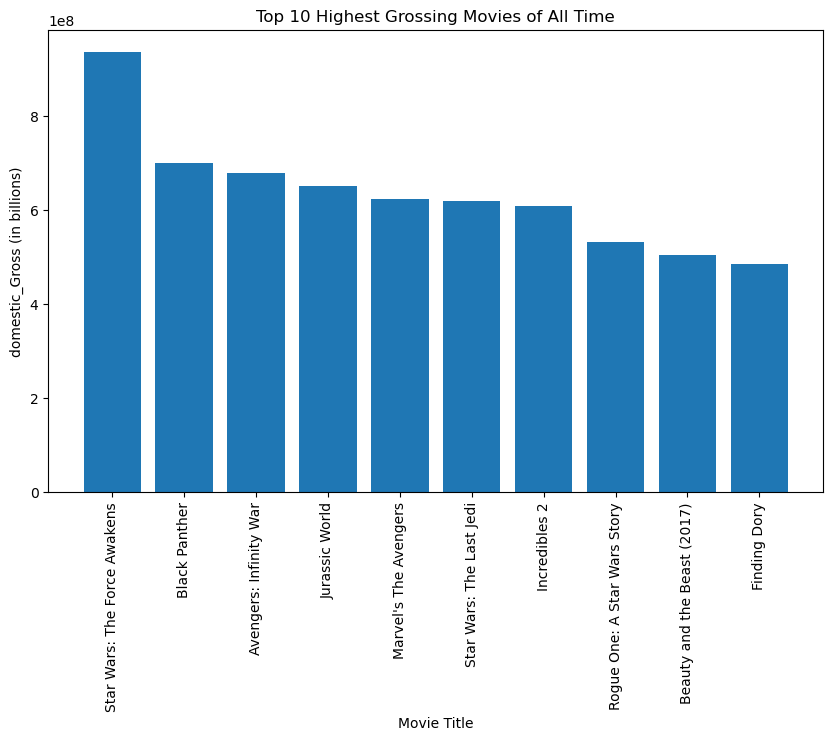

In [14]:

bom_movie['domestic_gross'] = bom_movie['domestic_gross'].replace(',', '').astype(float)
top_10 = bom_movie[['title', 'domestic_gross']].sort_values(by='domestic_gross', ascending=False)[:10]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_10['title'], top_10['domestic_gross'])
ax.set_title('Top 10 Highest Grossing Movies of All Time')
ax.set_xlabel('Movie Title')
ax.set_ylabel('domestic_Gross (in billions)')
plt.xticks(rotation=90)
plt.show()



# Analysis 2: Number of Movies Released by Year

- Number of movies released each year and visualize it using a line chart.






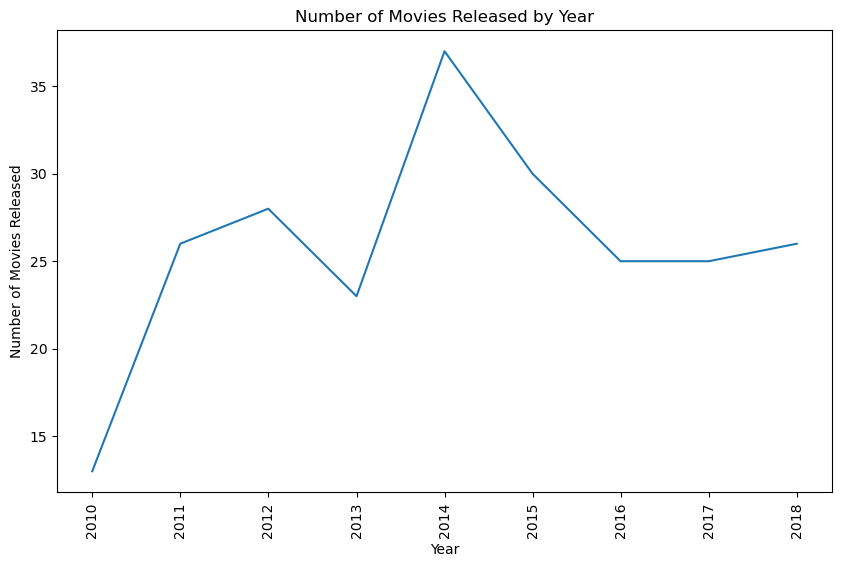

In [15]:

#- This code will extract the release year of each movie from its title
# calculate the number of movies released each year, and create a line chart to visualize the results.



bom_movie['year'] = pd.to_datetime(bom_movie['title'].str.extract('\((\d{4})\)')[0], format='%Y')
movie_count = bom_movie['year'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(movie_count.index, movie_count.values)
ax.set_title('Number of Movies Released by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies Released')
plt.xticks(rotation=90)
plt.show()


# SQL dataset (im.db)

importing and connecting the dataset to pandas

In [16]:
conn= sqlite3.connect(r'C:\Users\Admin\Desktop\MORINGASCHOOL\dsc-phase-1-project-v2-4\SWALEH ATHUMAN\im.db')

# Movie_basics sql dataset

In [17]:
#coverting the sql dataset into a dataframe 'imdb_df'
#select the all the columns in 'movie_basics' table 
imdb_df =pd.read_sql("""
SELECT *FROM 
movie_basics                     
                    """,conn)
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [18]:
#check the type of entities in all the columns
print(imdb_df.dtypes)

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object


In [19]:
#describing the dataset
imdb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


# Data cleaning the SQL imdb_df 

In [20]:

# Number of duplicated rows 
no_duplicates= imdb_df.duplicated().sum()
print('Number of duplicated rows:', no_duplicates)


Number of duplicated rows: 0


- Handling missing values in the 'imdb_df'  dataframe

In [21]:

missing_vals= imdb_df.isnull()      #check for missing values

missing_vals.sum()        # add the total missing values in each column


movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

- The resulting 'genres' column will contain "unknown" for any rows where the original value was missing or NaN. This is a  strategy for handling missing data in categorical or text columns where it is not appropriate to interpolate or estimate missing values.

In [22]:
#replace missing values in 'genres' column with "unknown"
imdb_df['genres'] = imdb_df['genres'].fillna('unknown')
imdb_df['genres']


0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                 unknown
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [23]:
# replace missing values in runtime_minutes column with the median value
imdb_df['runtime_minutes'] = imdb_df['runtime_minutes'].fillna(imdb_df['runtime_minutes'].median())
imdb_df.isnull().sum()

movie_id            0
primary_title       0
original_title     21
start_year          0
runtime_minutes     0
genres              0
dtype: int64

In [24]:
#Fill in missing runtime values with the median runtime value of all movies.

imdb_df['runtime_minutes'].fillna(imdb_df['runtime_minutes'].median(), inplace=True)



- Use the astype() function to convert the "start_year" column from an integer to a datetime object.


In [25]:
imdb_df['start_year'] = pd.to_datetime(imdb_df['start_year'], format='%Y')
imdb_df['start_year']

0        2013-01-01
1        2019-01-01
2        2018-01-01
3        2018-01-01
4        2017-01-01
            ...    
146139   2019-01-01
146140   2015-01-01
146141   2013-01-01
146142   2017-01-01
146143   2013-01-01
Name: start_year, Length: 146144, dtype: datetime64[ns]

- Remove unnecessary columns: Use the drop() method to remove unnecessary columns. 
- remove the "original_title" column if you only need the English title.


In [26]:
imdb_df.drop(['original_title'], axis=1, inplace=True)



In [27]:
imdb_df.head()

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013-01-01,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019-01-01,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018-01-01,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018-01-01,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017-01-01,80.0,"Comedy,Drama,Fantasy"


In [28]:

imdb_df_filtered = imdb_df.loc[(imdb_df['start_year'] >= '2010') & (imdb_df['start_year'] <= '2018') ]

grouped_genres = imdb_df_filtered.groupby('genres')



# imdb_df data analysis and visualization

- Filter the imdb_df DataFrame to only include movies released between 2010 and 2020, and then group the movies by year and count the number of movies in each year. 
- create a bar chart of the number of movies released per year from 2010 to 2020.





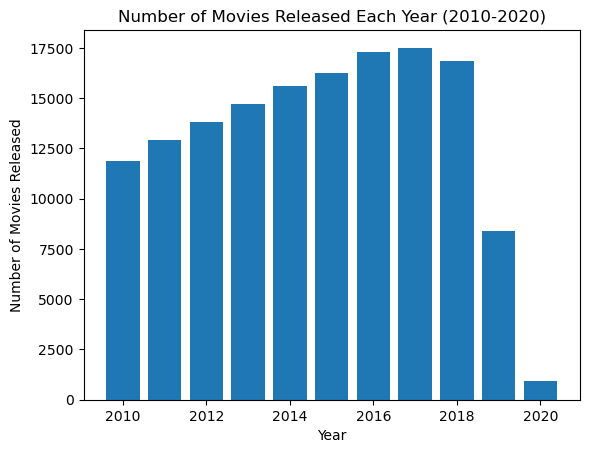

In [29]:

# Filter DataFrame to only include movies released between 2010 and 2020
recent_movies = imdb_df[(imdb_df['start_year'].dt.year >= 2010) & (imdb_df['start_year'].dt.year <= 2020)]

# Group movies by year and count the number of movies in each year
movies_per_year = recent_movies.groupby(recent_movies['start_year'].dt.year)['movie_id'].count()

# Create a bar chart of the number of movies released per year from 2010 to 2020
plt.bar(movies_per_year.index, movies_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year (2010-2020)')
plt.show()


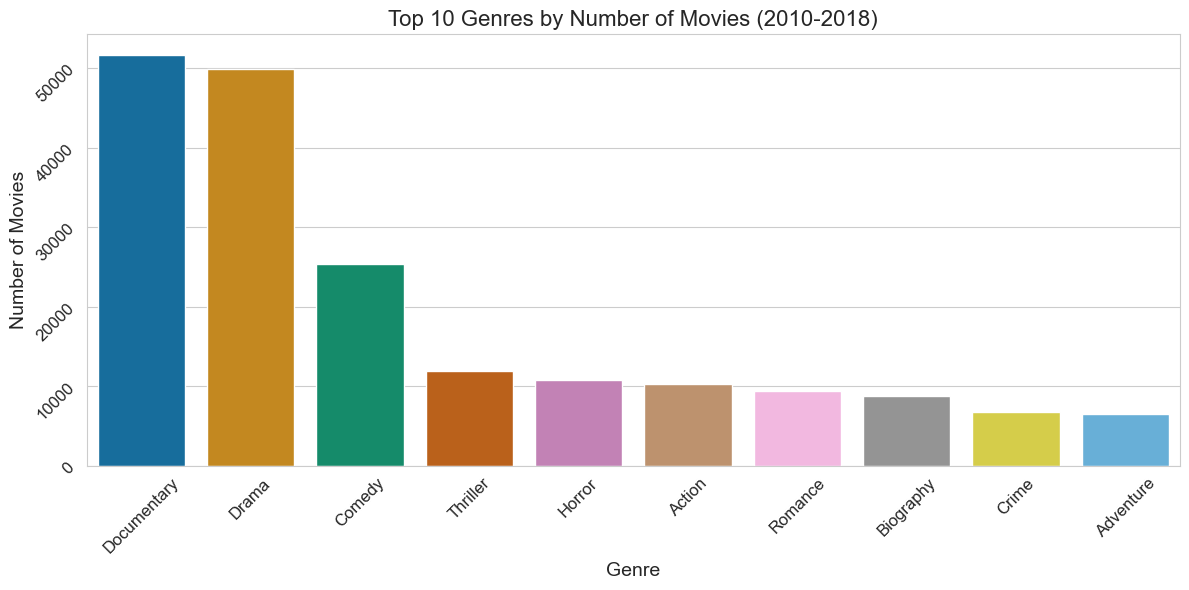

In [30]:
sns.set_style('whitegrid')
sns.set_palette('colorblind')

genre_counts = imdb_df['genres'].str.split(',', expand=True).stack().reset_index(drop=True).value_counts()

plt.figure(figsize=(12,6))
ax = sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10])
ax.set_title('Top 10 Genres by Number of Movies (2010-2018)', fontsize=16)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Number of Movies', fontsize=14)
ax.tick_params(labelsize=12, rotation=45)
plt.tight_layout()
plt.show()


# Movie_ratings SQL dataset

# Loading 

In [31]:
imdb_movie_ratings= pd.read_sql("""     
SELECT * FROM movie_ratings              
              """,conn)
imdb_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [32]:
#data types in the columns
print(imdb_movie_ratings.dtypes)

movie_id          object
averagerating    float64
numvotes           int64
dtype: object


In [33]:
missing_values1= imdb_movie_ratings.isnull()    #missing values
missing_values1.sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [36]:
imdb_movie_ratings['numvotes'] = imdb_movie_ratings['numvotes'].astype(float)
imdb_movie_ratings['numvotes']

0           31.0
1          559.0
2           20.0
3        50352.0
4           21.0
          ...   
73851       25.0
73852       24.0
73853       14.0
73854        5.0
73855      128.0
Name: numvotes, Length: 73856, dtype: float64

In [37]:
imdb_df.duplicated

imdb_movie_ratings.drop_duplicates(inplace=True)


- handle  missing values  


In [38]:
imdb_movie_ratings['numvotes'] = imdb_movie_ratings['numvotes'].astype(float)

In [39]:
#Handle missing values: Use the fillna() method to fill in missing values with a specific value or method. 

imdb_movie_ratings['averagerating'].fillna(imdb_movie_ratings['averagerating'].median(), inplace=True)

In [40]:
# Convert data types: Use the astype() method to convert data types. For example, you can convert the "numvotes" column from an integer to a float.
imdb_movie_ratings['numvotes'] = imdb_movie_ratings['numvotes'].astype(float)
imdb_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31.0
1,tt10384606,8.9,559.0
2,tt1042974,6.4,20.0
3,tt1043726,4.2,50352.0
4,tt1060240,6.5,21.0
...,...,...,...
73851,tt9805820,8.1,25.0
73852,tt9844256,7.5,24.0
73853,tt9851050,4.7,14.0
73854,tt9886934,7.0,5.0


Joining the two tables (movie_basics and movie_ratings)

In [41]:
joined_table= pd.read_sql(""" 
SELECT * FROM movie_ratings
JOIN movie_basics
USING(movie_id)
ORDER BY numvotes DESC;

 """,conn)
joined_table

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
73851,tt8420530,6.8,5,Tia and Piujuq,Tia and Piujuq,2018,80.0,Family
73852,tt8747790,4.6,5,A Monks Madness,A Monks Madness,2018,NaN,Action
73853,tt9367004,8.2,5,Up to the Last Drop: The Secret Water War in E...,Mehri tin teleftaia stagona: O mystikos polemo...,2017,58.0,Documentary
73854,tt9647642,2.0,5,The Confederate,The Confederate,2018,99.0,History


In [42]:
joined_table.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"


# tmdb.movies.csv dataset
- loading tmdb.movies dataset

In [43]:
tmdb_movies= pd.read_csv(r'C:\Users\Admin\Desktop\MORINGASCHOOL\dsc-phase-1-project-v2-4\SWALEH ATHUMAN\tmdb.movies.csv')
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [44]:
tmdb_movies.describe    # information about tmdb_movies

<bound method NDFrame.describe of        Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   201

# Duplicates

- Remove duplicates: Use the drop_duplicates() method to remove duplicate rows from the DataFrame.


In [45]:

#duplicated rows
tmdb_movies.duplicated
tmdb_movies.drop_duplicates(inplace=True)     #drop duplicates


Missing values in tmdb_movies

In [46]:
#check for missing values in columns
tmdb_movies.isnull().sum()




Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

# Convert data types
- Convert release_date column from a string to a datatime object

In [49]:
#Convert data types: Use the astype() method to convert data types. 

tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], format='%Y-%m-%d')
tmdb_movies['release_date']  


0       2010-11-19
1       2010-03-26
2       2010-05-07
3       1995-11-22
4       2010-07-16
           ...    
26512   2018-10-13
26513   2018-05-01
26514   2018-10-01
26515   2018-06-22
26516   2018-10-05
Name: release_date, Length: 26517, dtype: datetime64[ns]

In [50]:
#print the first five rows
# check the release date column to confirm datatime object formation
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


split 

# tn.movie_budgets

In [51]:
#loading the dataset
movie_budget= pd.read_csv(r'C:\Users\Admin\Desktop\MORINGASCHOOL\dsc-phase-1-project-v2-4\SWALEH ATHUMAN\tn.movie_budgets.csv')
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [52]:
movie_budget.drop_duplicates(inplace=True)

- The codereplaces the dollar sign and comma characters in the production_budget, domestic_gross, and worldwide_gross columns with an empty string ('') using the replace() method, and then converts the resulting strings to float data types using the astype() method. - This will ensure that these columns contain numerical values that can be used for analysis.





In [53]:
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

print(movie_budget.head())


   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08  
3        330600000.0     459005868.0     1.403014e+09  
4        317000000.0     620181382.0     1.316722e+09  


C:\Users\Admin\AppData\Local\Temp\ipykernel_3788\1872904920.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3788\1872904920.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3788\1872904920.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will

In [54]:
#Convert data types: Use the astype() method to convert data types. 
# convert the "release_date" column from a string to a datetime object.


movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'])
movie_budget['release_date']                

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [55]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [56]:
#Add new column: "profit" column by subtracting the production budget from the worldwide gross.


movie_budget['profit'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']
movie_budget['profit']


0       2.351345e+09
1       6.350639e+08
2      -2.002376e+08
3       1.072414e+09
4       9.997217e+08
            ...     
5777   -7.000000e+03
5778    2.344950e+05
5779   -3.662000e+03
5780   -1.400000e+03
5781    1.799410e+05
Name: profit, Length: 5782, dtype: float64

In [57]:
movie_budget.columns      #display all the columns including the newly added 'profit' column

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profit'],
      dtype='object')

In [58]:
movie_budget.head()   # display the first 5 rows 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


- Rename column using the .rename()   function

In [59]:
#Rename the "movie" column to "title" for consistency with other DataFrames.


movie_budget.rename(columns={'movie': 'title'}, inplace=True)
movie_budget


,id,release_date,title,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.344950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03


# Distribution of movie budgets
- create a histogram of the production_budget column to see the distribution of movie budgets.

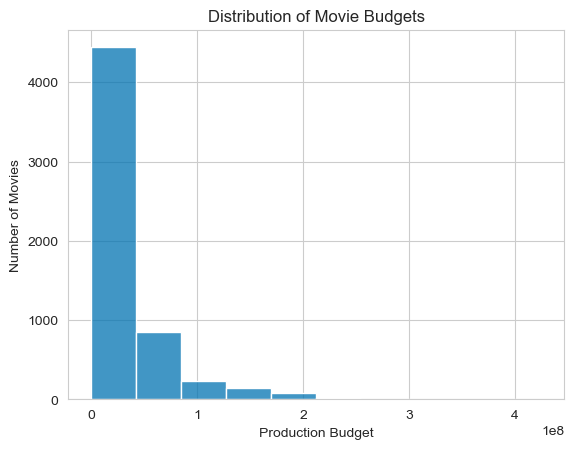

In [60]:

sns.histplot(movie_budget['production_budget'], kde=False, bins=10)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Production Budget')
plt.ylabel('Number of Movies')
plt.show()


# Relationship between budget and profit: 
- create a scatter plot of the production_budget column against the profit column to see the relationship between a movie's budget and its profitability.

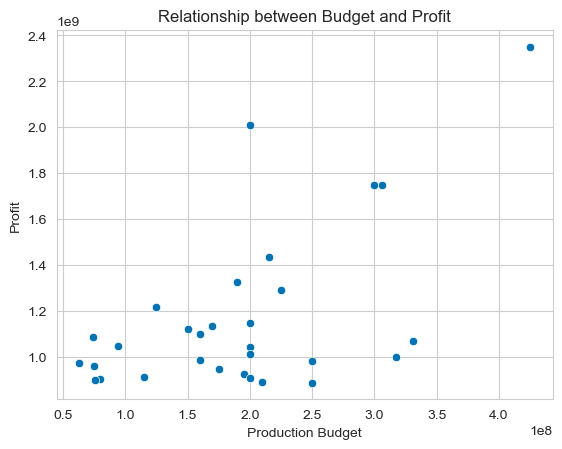

In [61]:


# Get the top 20 highest profit movies
top_30 = movie_budget.nlargest(30, 'profit')

# Create a scatter plot
sns.scatterplot(x='production_budget', y='profit', data=top_30)

# Set title and axis labels
plt.title('Relationship between Budget and Profit')
plt.xlabel('Production Budget')
plt.ylabel('Profit')

# Show the plot
plt.show()


# Top 10 most profitable movies
* create a bar plot of the top 10 most profitable movies using the profit column.


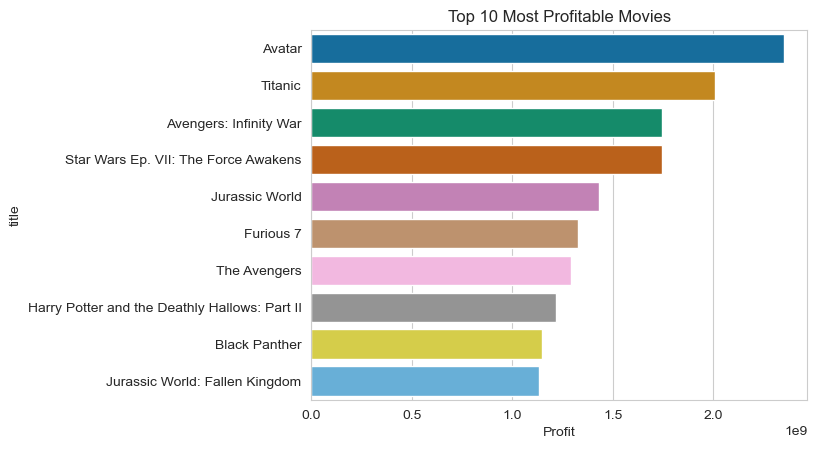

In [62]:

#This will create a horizontal bar chart showing the top 10 most profitable movies with the movie titles on the y-axis
# and the profits on the x-axis.

# Sort the dataframe by profit in descending order and select the top 10
top10_profit = movie_budget.sort_values(by='profit', ascending=False).head(10)

# Create a horizontal bar chart
sns.barplot(x='profit', y='title', data=top10_profit)
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profit')
plt.ylabel('title')
plt.show()


# 1.Budget Analysis:


- To explore the relationship between movie budgets and worldwide gross, 
- use the movie_budget DataFrame to create a scatter plot of production budget vs. worldwide gross



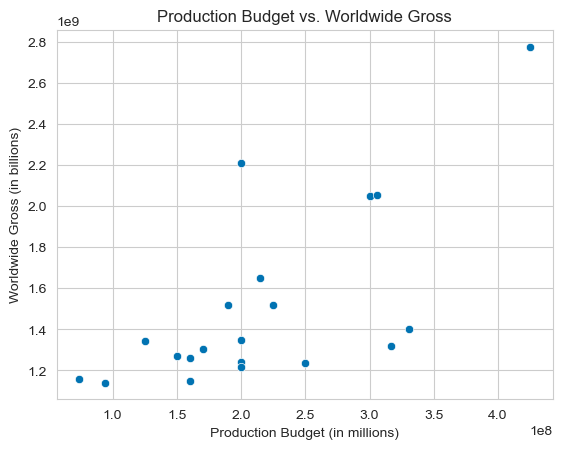

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate profit
movie_budget['profit'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']

# Get the top 20 highest profit movies
top_20 = movie_budget.nlargest(20, 'profit')

# Create a scatter plot
sns.scatterplot(x='production_budget', y='worldwide_gross', data=top_20)

# Set title and axis labels
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Worldwide Gross (in billions)')

# Show the plot
plt.show()


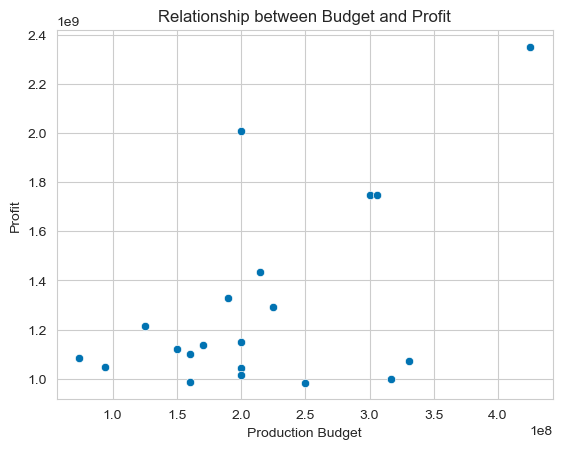

In [64]:


# Get the top 20 highest profit movies
top_20 = movie_budget.nlargest(20, 'profit')

# Create a scatter plot
sns.scatterplot(x='production_budget', y='profit', data=top_20)

# Set title and axis labels
plt.title('Relationship between Budget and Profit')
plt.xlabel('Production Budget')
plt.ylabel('Profit')

# Show the plot
plt.show()


# 1.Recommendation
* Based on this analysis, Microsoft's new movie studio should be prepared to invest in high production budgets for their films in order to maximize their potential for worldwide gross and profits.



# 2.Top 10 genres by worldwide gross 



- merge imdb_df and movie_budgets 
- filter top ten genres from 2010 to 2018
- Group movies by their genres
- plot a horizontal bar graph for worldwide gross by genre


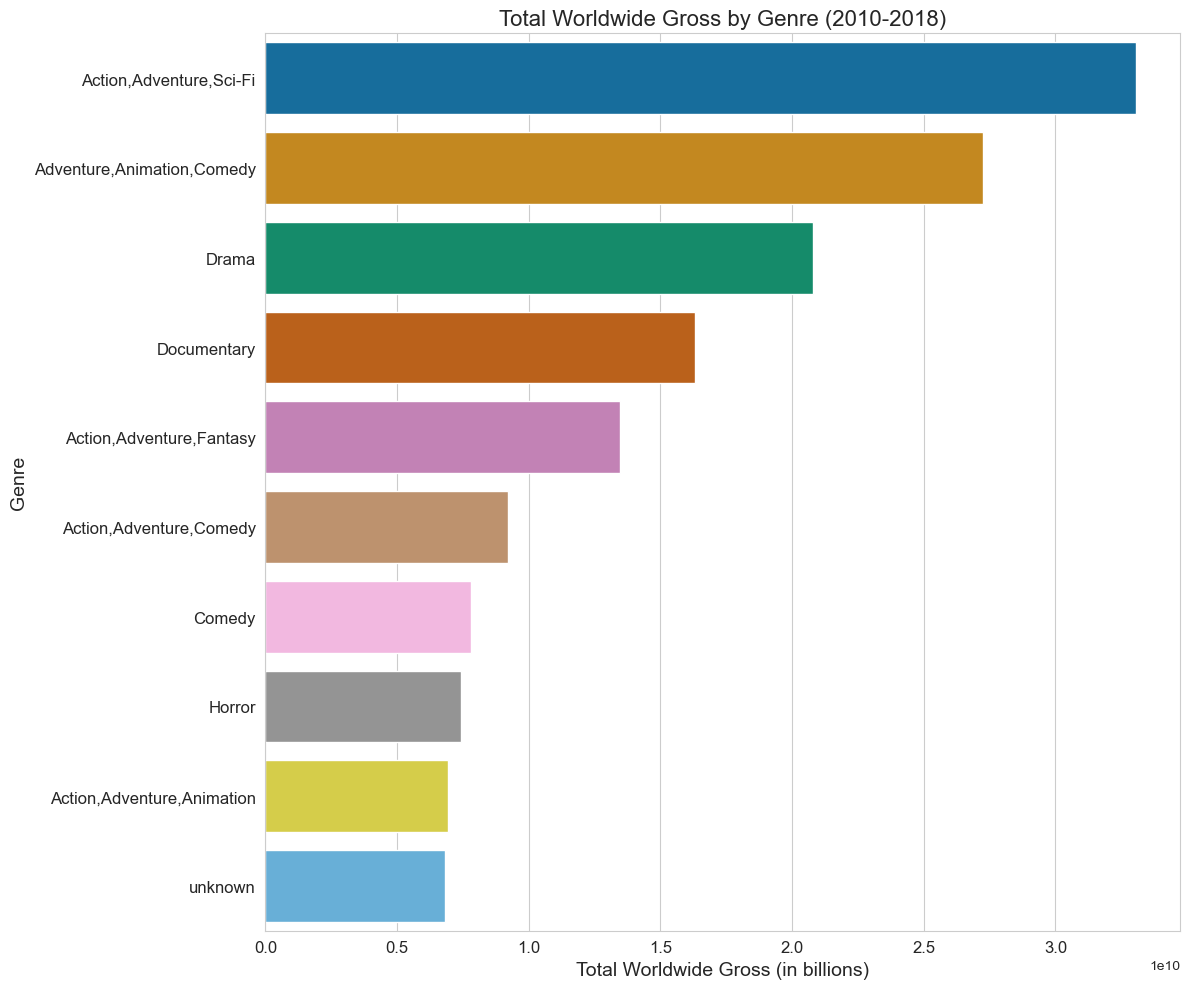

In [65]:
# Merge the imdb_df and movie_budgets dataframes
merged_df = pd.merge(imdb_df, movie_budget, left_on='primary_title', right_on='title', how='left')

# Filter to only include movies released between 2010 and 2018
merged_df_filtered = merged_df.loc[(merged_df['start_year'] >= '2010') & (merged_df['start_year'] <= '2018')]

# Group the movies by genre and calculate the total worldwide gross for each genre
grouped_genres = merged_df_filtered.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False)[:10]

# Create a horizontal bar chart of the total worldwide gross by genre
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=grouped_genres.values, y=grouped_genres.index, orient='h')
ax.set_title('Total Worldwide Gross by Genre (2010-2018)', fontsize=16)
ax.set_xlabel('Total Worldwide Gross (in billions)', fontsize=14)
ax.set_ylabel('Genre', fontsize=14)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()



* Total profits by each genre

In [66]:
# Calculate the profits for each movie
merged_df_filtered['profits'] = merged_df_filtered['worldwide_gross'] - merged_df_filtered['production_budget']

# Group the movies by genre and calculate the total profits for each genre
grouped_genres = merged_df_filtered.groupby('genres')['profits'].sum().sort_values(ascending=False)


#Merge the imdb_df and movie_budgets dataframes
merged_df = pd.merge(imdb_df, movie_budget, left_on='primary_title', right_on='title', how='left')


# Get the top 10 genres by worldwide gross
top_genres = grouped_genres[:10]

C:\Users\Admin\AppData\Local\Temp\ipykernel_3788\2382003719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_filtered['profits'] = merged_df_filtered['worldwide_gross'] - merged_df_filtered['production_budget']


- Create a horizontal bar chart with the total profits on the x-axis and the genres on the y-axis.
- The genres will be sorted by the total profits, with the most profitable genre at the top.
- The palette='Blues_d' argument sets the color scheme for the bars

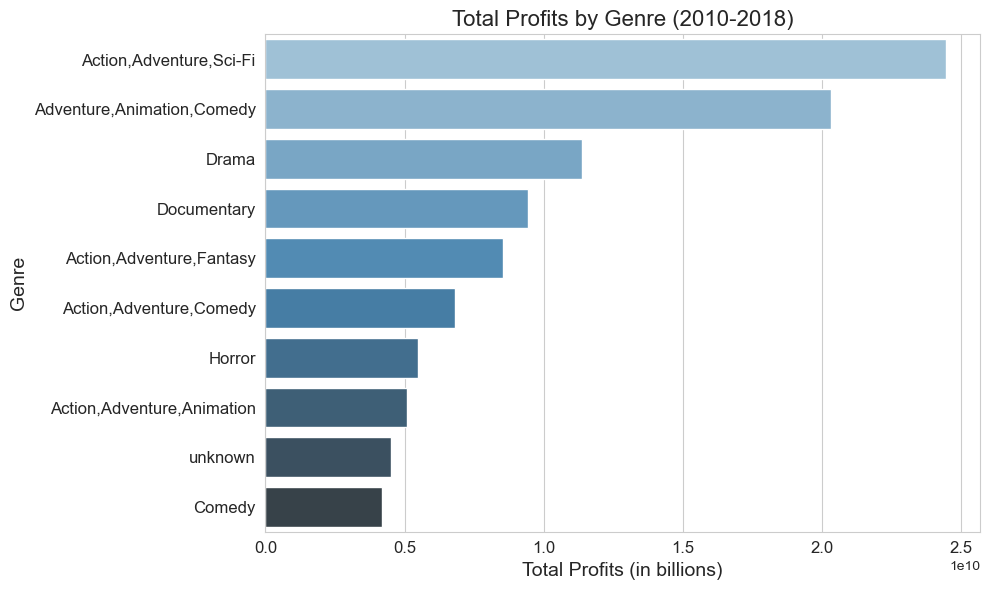

In [67]:
plt.figure(figsize=(10,6))
#ax = sns.barplot(x=grouped_genres.values, y=grouped_genres.index)
ax = sns.barplot(x=top_genres.values, y=top_genres.index, palette='Blues_d')   

ax.set_title('Total Profits by Genre (2010-2018)', fontsize=16)
ax.set_xlabel('Total Profits (in billions)', fontsize=14)
ax.set_ylabel('Genre', fontsize=14)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()


# 2.Recommendation

- Based on our analysis, Microsoft's new movie studio should consider creating movies on Action, Adventure, and Science Fiction genres since they generate the most number of profits. 

# 3.Release Date
- Check the total number of numbers released each year
- total number of movies released each month, calcute the time of the year when most movies are 

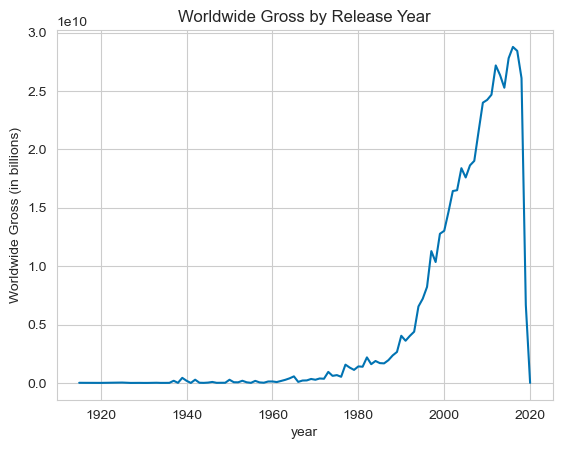

In [68]:
by_year = movie_budget.groupby(movie_budget['release_date'].dt.year)['worldwide_gross'].sum()
plt.plot(by_year.index, by_year)
plt.xlabel('year')
plt.ylabel('Worldwide Gross (in billions)')
plt.title('Worldwide Gross by Release Year')
plt.show()


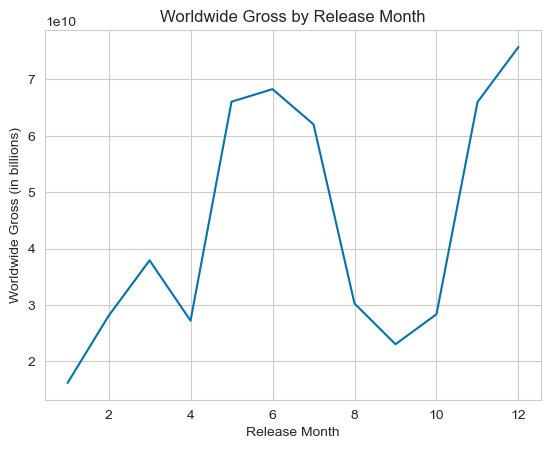

In [69]:


# Convert release_date column to datetime
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'])

# Group by release month and calculate total worldwide gross
by_month = movie_budget.groupby(movie_budget['release_date'].dt.month)['worldwide_gross'].sum()

# Create a line plot
plt.plot(by_month.index, by_month)

# Set title and axis labels
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross (in billions)')
plt.title('Worldwide Gross by Release Month')

# Show the plot
plt.show()


# 3.Recommendation
* Microsoft's new movie studio should consider releasing their films during the summer months (May - August) as this is when the highest worldwide grosses are typically achieved.



# Overall

* These data analysis and visualizations suggest that Microsoft's new movie studio should focus on creating movies in the Action, 
Adventure, and Science Fiction genres, with high production budgets, and aim to release their films during the summer months.



